# 1. Compréhension des données 

https://medium.com/swlh/exploratory-data-analysis-on-the-bank-marketing-data-set-with-pandas-and-seaborn-72e5c05e0076
https://www.kaggle.com/janiobachmann/bank-marketing-campaign-opening-a-term-deposit
https://www.kaggle.com/aleksandradeis/bank-marketing-analysis

## Données sur le client

1 - age: (numeric) : âge 

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') : type de métier

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) : statut marital 

4 - education: (categorical: primary, secondary, tertiary and unknown) : niveau d'éducation (lycée, fac...)

5 - default: has credit in default? (categorical: 'no','yes','unknown') : est-ce qu'il a un défaut de crédit (il n'est pas capable de payer son crédit) ? un compte en défaut figure dans un dossier de crédit sans son historique de banque

6 - housing: has housing loan? (categorical: 'no','yes','unknown') : est-ce qu'il a un prêt immo ?

7 - loan: has personal loan? (categorical: 'no','yes','unknown') : est-ce qu'il a un prêt perso ?

8 - balance: Balance of the individual : la moyenne du solde du compte de la personne sur l'année

## Données relatives au dernier contact lors de la dernière campagne marketing

8 - contact: contact communication type (categorical: 'cellular','telephone') : dernier contact de la campagne actuelle

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') : dernier contact du mois

10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') : dernier contact de la journée 

11 - duration: last contact duration, in seconds (numeric) : durée de l'appel en secondes (est-ce que la durée de l'appel a un impact sur la souscription du compte) 

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Autres données 

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) : nombre de contacts effectués durant cette campagne et pour ce client => campagne actuelle 

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) : nombre de jours qui se sont écoulés après la dernière fois que le client ait été contacté à partir d'une campagne précédente 

14 - previous: number of contacts performed before this campaign and for this client (numeric) : nombre de contacts effectués avant cette campagne pour ce client => campagne précédente

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') : résultat de la campagne marketing précédente => campagne précédente

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no') : objectif de la campagne marketing : est-ce que le client a souscrit un livret épargne ? => cette campagne cible les personnes qui sont pas clientes de la banque => campagne actuelle 

In [1]:
# Import Libraries #
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt  # matplotlib for plotting
import seaborn as sns  # seaborn to help with visualizations

In [2]:
bank = pd.read_csv('bank.csv')
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [3]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
bank.shape

(11162, 17)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# 2. Nettoyage et préparation du dataset

In [6]:
bank.isnull().sum()
#Pas de valeurs manquantes

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
bank_duplicates = bank[bank.duplicated(keep=False)]
bank_duplicates
#Pas de valeurs doublons

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [8]:
bank.describe()
#L'âge moyen est de 41 ans
#Le solde moyen du compte est de 1 528 dollars
#day : en moyenne, ils sont appelés le 15 du mois
#pdays : en moyenne, 51 jours écoulés depuis la dernier campagne marketing 

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# 3. Analyse du dataset

## a) Vue d'ensemble du dataset

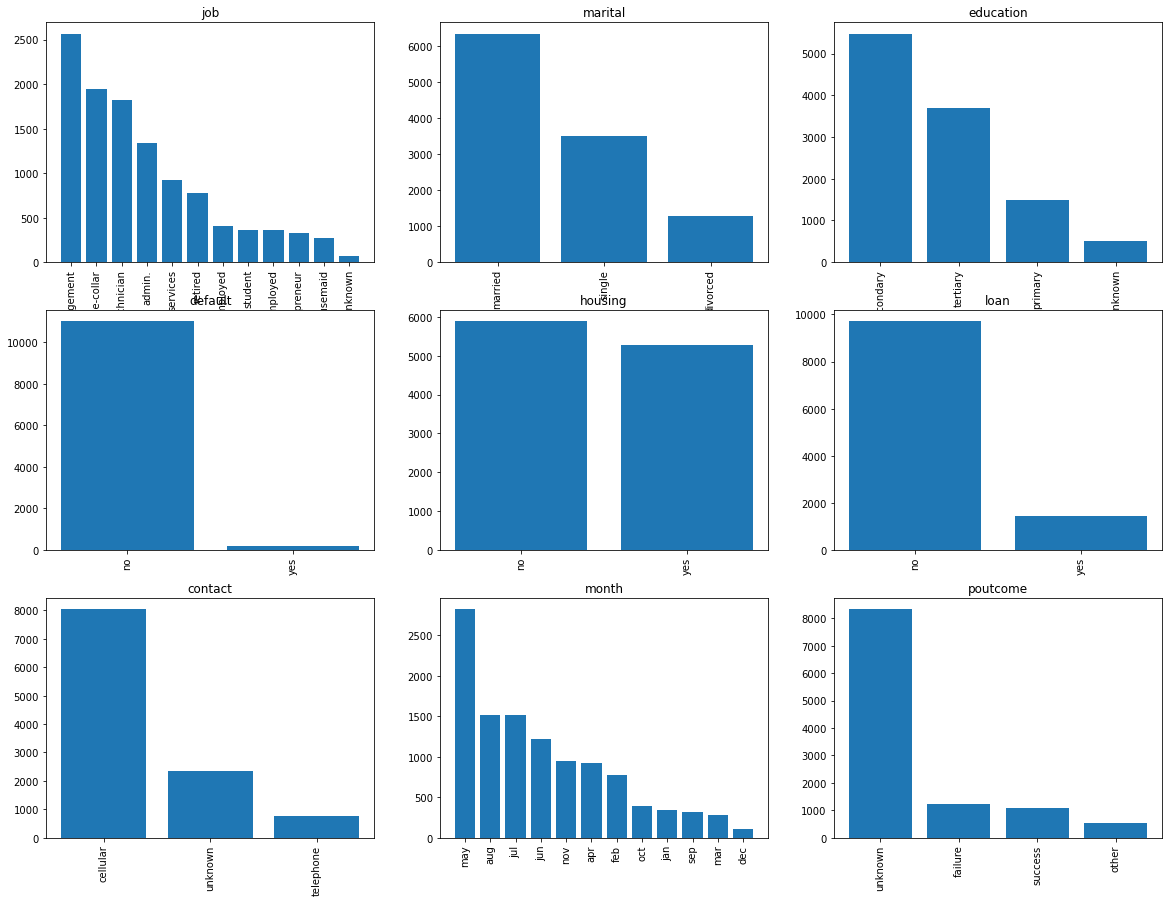

In [9]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = bank[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

## b) Analyse des données bancaires des prospects

*Identifier les clients qui ont des prêts => loan, housing
*Identifier les clients qui ont des défauts de crédit => default
*Identifier les comptes courants qui sont passifs (=solde le plus élévé) => balance

### Identifier les clients qui ont des prêts => loan, housing

In [10]:
#Clients qui ont des prêts perso (loan)
Client_pret_perso = bank[bank['loan'] == 'yes']
Client_pret_perso

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
12,29,management,married,tertiary,no,199,yes,yes,unknown,7,may,1689,4,-1,0,unknown,yes
19,49,admin.,divorced,secondary,no,168,yes,yes,unknown,8,may,513,1,-1,0,unknown,yes
40,60,blue-collar,married,primary,no,1262,yes,yes,unknown,13,may,1015,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,38,unemployed,divorced,secondary,no,189,yes,yes,cellular,21,jul,105,2,-1,0,unknown,no
11146,30,admin.,married,secondary,yes,23,no,yes,cellular,4,feb,149,2,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no


In [11]:
# Pourcentage de client ayant un prêt perso 
print((len(Client_pret_perso))/len(bank)*100)
#13% des clients ont un prêt perso 

13.080093173266441


In [12]:
#Clients qui ont des prêts immo (housing)
Client_pret_immo = bank[bank['housing'] == 'yes']
Client_pret_immo

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no


In [13]:
# Pourcentage de client ayant un prêt immo 
print((len(Client_pret_immo))/len(bank)*100)
#47% des clients ont un prêt immo 

47.312309621931554


In [14]:
#Clients qui ont des prêts perso (loan) et immo (housing)
Client_pret_perso = bank[bank['loan'] == 'yes']
Client_pret_immo = bank[bank['housing'] == 'yes']
Client_pret_perso_immo = bank[(bank['loan']== 'yes') & (bank['housing'] == 'yes' )]
Client_pret_perso_immo

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
12,29,management,married,tertiary,no,199,yes,yes,unknown,7,may,1689,4,-1,0,unknown,yes
19,49,admin.,divorced,secondary,no,168,yes,yes,unknown,8,may,513,1,-1,0,unknown,yes
40,60,blue-collar,married,primary,no,1262,yes,yes,unknown,13,may,1015,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126,35,unemployed,married,secondary,yes,1054,yes,yes,cellular,21,nov,106,1,-1,0,unknown,no
11132,32,blue-collar,married,secondary,no,-325,yes,yes,unknown,21,may,171,1,-1,0,unknown,no
11143,38,unemployed,divorced,secondary,no,189,yes,yes,cellular,21,jul,105,2,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no


In [15]:
# Pourcentage de client ayant à la fois un prêt immo (housing) et perso (loan)
print((len(Client_pret_perso_immo))/len(bank)*100)
#7% des clients ont un prêt immo et perso

7.4807382189571765


Potentiel des prospects en terme de placement

In [16]:
#le solde moyen du compte courant des clients ayant un prêt perso  
Loan_balance = Client_pret_perso.groupby('loan')['balance'].mean().sort_values
Loan_balance

#Ceux qui ont un prêt perso ont un solde moyen de 825 dollars 

<bound method Series.sort_values of loan
yes    825.25137
Name: balance, dtype: float64>

In [17]:
Loan_balance_2 = Client_pret_perso.groupby('loan')['balance'].sum().sort_values
Loan_balance_2

<bound method Series.sort_values of loan
yes    1204867
Name: balance, dtype: int64>

In [18]:
#le solde moyen du compte courant des clients ayant un prêt immo
Housing_balance = Client_pret_immo.groupby('housing')['balance'].mean().sort_values
Housing_balance

#Ceux qui ont un prêt immo ont un solde moyen de 1 266 dollars 

<bound method Series.sort_values of housing
yes    1266.151108
Name: balance, dtype: float64>

In [19]:
#le solde moyen du compte courant des clients ayant à la fois un prêt immo et perso 
Housing_Loan_balance = Client_pret_perso_immo.groupby(['loan','housing'])['balance'].mean().sort_values
Housing_Loan_balance

#Ceux qui ont à la fois un prêt immo et perso ont un solde moyen de 771 dollars 

<bound method Series.sort_values of loan  housing
yes   yes        771.811976
Name: balance, dtype: float64>

### Identifier les clients qui ont des défauts de crédit => default

In [20]:
#Prospects qui ont des défauts de crédit
Client_default = bank[bank['default'] == 'yes']
Client_default

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
30,32,blue-collar,married,secondary,yes,-1,yes,no,unknown,9,may,653,1,-1,0,unknown,yes
114,30,blue-collar,single,secondary,yes,239,yes,no,unknown,21,may,412,1,-1,0,unknown,yes
210,42,technician,single,secondary,yes,-1129,yes,no,unknown,2,jun,555,5,-1,0,unknown,yes
213,44,management,divorced,tertiary,yes,-411,yes,no,unknown,2,jun,432,4,-1,0,unknown,yes
216,40,self-employed,married,secondary,yes,-754,yes,yes,unknown,3,jun,941,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11023,37,self-employed,married,secondary,yes,0,yes,no,cellular,17,jul,158,1,-1,0,unknown,no
11053,34,management,single,tertiary,yes,621,no,no,cellular,28,aug,205,3,-1,0,unknown,no
11070,31,management,single,tertiary,yes,-365,yes,no,unknown,30,may,319,6,-1,0,unknown,no
11126,35,unemployed,married,secondary,yes,1054,yes,yes,cellular,21,nov,106,1,-1,0,unknown,no


In [21]:
# Pourcentage de prospects ayant des défauts de crédit
print((len(Client_default))/len(bank)*100)
#1,5% des prospects ont des défauts de crédit

1.50510661171833


In [22]:
#Parmi les clients ayant un prêt perso, on veut voir ceux qui ont des défauts de crédit
Client_pret_perso_default = Client_pret_perso[Client_pret_perso['default'] == 'yes']
Client_pret_perso_default

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
216,40,self-employed,married,secondary,yes,-754,yes,yes,unknown,3,jun,941,3,-1,0,unknown,yes
380,41,blue-collar,single,secondary,yes,1085,yes,yes,cellular,7,jul,599,1,-1,0,unknown,yes
394,26,blue-collar,single,secondary,yes,81,no,yes,cellular,8,jul,803,2,-1,0,unknown,yes
406,29,admin.,divorced,tertiary,yes,0,no,yes,cellular,9,jul,426,3,-1,0,unknown,yes
408,38,management,married,tertiary,yes,327,yes,yes,cellular,9,jul,556,5,-1,0,unknown,yes
566,41,blue-collar,married,secondary,yes,720,no,yes,cellular,24,jul,651,1,-1,0,unknown,yes
622,44,unemployed,single,primary,yes,-4,no,yes,cellular,30,jul,788,2,-1,0,unknown,yes
627,41,services,married,unknown,yes,-1,no,yes,cellular,30,jul,1171,4,-1,0,unknown,yes
997,41,blue-collar,single,secondary,yes,-386,no,yes,cellular,20,nov,477,1,-1,0,unknown,yes
1555,45,blue-collar,married,primary,yes,-443,yes,yes,cellular,20,apr,691,1,-1,0,unknown,yes


In [23]:
Client_pret_perso_default['default'].value_counts()

#57 clients ayant un prêt perso ont un défaut de crédit

yes    57
Name: default, dtype: int64

In [24]:
# Pourcentage de clients ayant un prêt perso et des défauts de crédit
print((len(Client_pret_perso_default))/len(bank)*100)
#0,5% des clients ayant un prêt perso et des défauts de crédit

0.5106611718330049


In [25]:
#Parmi les clients ayant un prêt immo, on veut voir ceux qui ont des défauts de crédit
Client_pret_immo_default = Client_pret_immo[Client_pret_immo['default'] == 'yes']
Client_pret_immo_default

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
30,32,blue-collar,married,secondary,yes,-1,yes,no,unknown,9,may,653,1,-1,0,unknown,yes
114,30,blue-collar,single,secondary,yes,239,yes,no,unknown,21,may,412,1,-1,0,unknown,yes
210,42,technician,single,secondary,yes,-1129,yes,no,unknown,2,jun,555,5,-1,0,unknown,yes
213,44,management,divorced,tertiary,yes,-411,yes,no,unknown,2,jun,432,4,-1,0,unknown,yes
216,40,self-employed,married,secondary,yes,-754,yes,yes,unknown,3,jun,941,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10968,35,management,married,tertiary,yes,-10,yes,no,cellular,15,may,168,2,364,1,other,no
11021,32,blue-collar,married,secondary,yes,-238,yes,no,unknown,27,may,427,1,-1,0,unknown,no
11023,37,self-employed,married,secondary,yes,0,yes,no,cellular,17,jul,158,1,-1,0,unknown,no
11070,31,management,single,tertiary,yes,-365,yes,no,unknown,30,may,319,6,-1,0,unknown,no


In [26]:
Client_pret_immo_default['default'].value_counts()

#87 clients ayant un prêt immo ont un défaut de crédit

yes    87
Name: default, dtype: int64

In [27]:
# Pourcentage de clients ayant un prêt immo et des défauts de crédit
print((len(Client_pret_immo_default))/len(bank)*100)
#0,8% des clients ayant un prêt immo et des défauts de crédit

0.7794302096398494


In [28]:
#Parmi les clients ayant à la fois un prêt immo et peros, on veut voir ceux qui ont des défauts de crédit
Client_pret_perso_immo_default = Client_pret_perso_immo[Client_pret_perso_immo['default'] == 'yes']
Client_pret_perso_immo_default

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
216,40,self-employed,married,secondary,yes,-754,yes,yes,unknown,3,jun,941,3,-1,0,unknown,yes
380,41,blue-collar,single,secondary,yes,1085,yes,yes,cellular,7,jul,599,1,-1,0,unknown,yes
408,38,management,married,tertiary,yes,327,yes,yes,cellular,9,jul,556,5,-1,0,unknown,yes
1555,45,blue-collar,married,primary,yes,-443,yes,yes,cellular,20,apr,691,1,-1,0,unknown,yes
1847,45,admin.,married,secondary,yes,-106,yes,yes,cellular,7,may,553,3,288,1,other,yes
4597,33,blue-collar,divorced,unknown,yes,-274,yes,yes,cellular,17,apr,715,2,329,2,failure,yes
4659,31,entrepreneur,single,tertiary,yes,-405,yes,yes,cellular,13,aug,703,2,-1,0,unknown,yes
5354,27,housemaid,married,secondary,yes,65,yes,yes,cellular,17,jul,59,1,-1,0,unknown,no
5611,45,management,married,tertiary,yes,-577,yes,yes,cellular,24,jul,204,1,-1,0,unknown,no
5655,47,technician,married,tertiary,yes,-813,yes,yes,unknown,16,jun,179,25,-1,0,unknown,no


In [29]:
Client_pret_perso_immo_default['default'].value_counts()

#23 clients ayant à la fois un prêt perso et immo ont un défaut de crédit

yes    23
Name: default, dtype: int64

In [30]:
# Pourcentage de clients ayant un prêt immo et perso et des défauts de crédit
print((len(Client_pret_perso_immo_default))/len(bank)*100)
#0,2% des clients ayant un prêt immo et perso et des défauts de crédit

0.2060562623185809


## c) Analyse des données socio-démographiques des prospects

age       
job
marital  
education